In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# The main purpose of this project is to answer a few questions:
# 1. Which company has most complaints?
# 2. What's the main reason for complaints for each company?
# 3. How companies react to complaints? Are consumers satisfied with the response?
# 4. Are there any patterns for the time complaints happened?
# 5. Build a model to predict if company with most complaints will provide timely response.

complaint = pd.read_csv('complaints2.csv')

/var/folders/h8/zy5q95td7t11cvkwz9yd5dph0000gn/T/ipykernel_7535/3182981152.py:7: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  complaint = pd.read_csv('complaints2.csv')


In [3]:
# First, let's have a brief look at the dataset. The dataset is from Data.Gov
# The Consumer Complaint Database is a collection of complaints about consumer financial products and services that 
# we sent to companies for response. 
# Complaints are published after the company responds, confirming a commercial relationship with the consumer, 
# or after 15 days, whichever comes first. 
complaint.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-11-11,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,NaN,"AmeriHome Mortgage Company, LLC",NC,28104.0,NaN,NaN,Web,2022-11-11,In progress,Yes,NaN,6190415
1,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",TN,37421.0,NaN,NaN,Web,2022-11-23,In progress,Yes,NaN,6236178
2,2022-11-16,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",FL,33458.0,Servicemember,NaN,Web,2022-11-16,Closed with explanation,Yes,NaN,6212558
3,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,MD,20814.0,NaN,Consent provided,Web,2022-11-15,Closed with explanation,Yes,NaN,6206885
4,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,NaN,NORTHERN OHIO INVESTMENT COMPANY,MO,63031.0,NaN,Other,Web,2022-11-08,Untimely response,No,NaN,6173945


In [4]:
complaint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101969 entries, 0 to 3101968
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 426.

In [5]:
complaint.describe()

,Complaint ID
count,3.101969e+06
mean,3.527005e+06
std,1.636105e+06
min,1.000000e+00
25%,2.474445e+06
50%,3.583409e+06
75%,4.855315e+06
max,6.242114e+06


In [6]:
# There are 6572 unique companies in the dataset.
complaint['Company'].unique().shape

(6572,)

In [7]:
complaint.index = complaint.loc[:,'Complaint ID']
complaint.drop(['Complaint ID'], axis = 1, inplace = True)
complaint.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
Complaint ID,,,,,,,,,,,,,,,,,
6190415,2022-11-11,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,NaN,"AmeriHome Mortgage Company, LLC",NC,28104.0,NaN,NaN,Web,2022-11-11,In progress,Yes,NaN
6236178,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",TN,37421.0,NaN,NaN,Web,2022-11-23,In progress,Yes,NaN
6212558,2022-11-16,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",FL,33458.0,Servicemember,NaN,Web,2022-11-16,Closed with explanation,Yes,NaN
6206885,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,MD,20814.0,NaN,Consent provided,Web,2022-11-15,Closed with explanation,Yes,NaN
6173945,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,NaN,NORTHERN OHIO INVESTMENT COMPANY,MO,63031.0,NaN,Other,Web,2022-11-08,Untimely response,No,NaN


In [8]:
# Let's look at missing values. It seems that most missing values are reasonable.
pd.isnull(complaint).sum()

Date received                         0
Product                               0
Sub-product                      235294
Issue                                 0
Sub-issue                        683355
Consumer complaint narrative    1987977
Company public response         1753185
Company                               0
State                             40021
ZIP code                          40453
Tags                            2750549
Consumer consent provided?       822113
Submitted via                         0
Date sent to company                  0
Company response to consumer          4
Timely response?                      0
Consumer disputed?              2333526
dtype: int64

In [9]:
# For sub-product, sub-issue, consumer-complaint narrative, company public response, tags, consumer consent provided,
# and consumer disputed, we will replace null values with N/A. For State and Zip code, we will simply remove record with
# missing values.
complaint['Sub-product'].fillna('N/A',inplace = True)
complaint['Sub-issue'].fillna('N/A',inplace = True)
complaint['Consumer complaint narrative'].fillna('N/A',inplace = True)
complaint['Company public response'].fillna('No',inplace = True)
complaint['Tags'].fillna('N/A',inplace = True)
complaint['Consumer consent provided?'].fillna('No',inplace = True)
complaint['Consumer disputed?'].fillna('No',inplace = True)

In [10]:
noa = complaint.dropna()
print('Missing values have been addressed! ')
noa.head()

Missing values have been addressed! 


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
Complaint ID,,,,,,,,,,,,,,,,,
6190415,2022-11-11,Mortgage,Conventional home mortgage,Trouble during payment process,N/A,N/A,No,"AmeriHome Mortgage Company, LLC",NC,28104.0,N/A,No,Web,2022-11-11,In progress,Yes,No
6236178,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,N/A,No,"EQUIFAX, INC.",TN,37421.0,N/A,No,Web,2022-11-23,In progress,Yes,No
6212558,2022-11-16,Mortgage,VA mortgage,Trouble during payment process,N/A,N/A,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",FL,33458.0,Servicemember,No,Web,2022-11-16,Closed with explanation,Yes,No
6206885,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,MD,20814.0,N/A,Consent provided,Web,2022-11-15,Closed with explanation,Yes,No
6173945,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,N/A,N/A,No,NORTHERN OHIO INVESTMENT COMPANY,MO,63031.0,N/A,Other,Web,2022-11-08,Untimely response,No,No


In [11]:
pd.isnull(noa).sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x11b786a60>,
 'caps': [<matplotlib.lines.Line2D at 0x11b7a0100>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b786790>],
 'medians': [<matplotlib.lines.Line2D at 0x11b7a05e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b7a08b0>],
 'means': []}

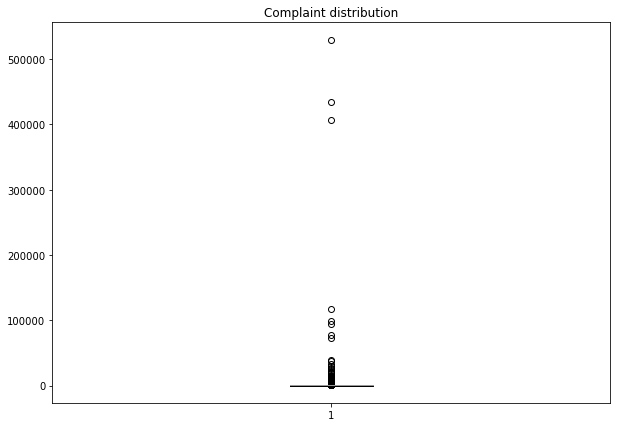

In [12]:
# As indicated by the boxplot, the number of complaints for each company is distributed very unevenly. Most companies
# have few complaints, leading to a very low median. However, outliers exist, with few companies' complaints numbers
# far exceed other companies.
fig, ax = plt.subplots(figsize = (10,7))
ax.set_title('Complaint distribution')
ax.boxplot(noa['Company'].value_counts())

In [13]:
# EQUIFAX INC has the most complaints.
noa['Company'].value_counts()

EQUIFAX, INC.                                       530049
TRANSUNION INTERMEDIATE HOLDINGS, INC.              434509
Experian Information Solutions Inc.                 406498
BANK OF AMERICA, NATIONAL ASSOCIATION               117191
WELLS FARGO & COMPANY                                99178
                                                     ...  
Pivot Financial Partners, Inc.                           1
ABC Loan of Martinez/ Georgia Finco Holding Corp         1
McMichael Taylor Gray LLC                                1
Sabatina & Associates, P.C.                              1
BAY VALLEY                                               1
Name: Company, Length: 6549, dtype: int64

/var/folders/h8/zy5q95td7t11cvkwz9yd5dph0000gn/T/ipykernel_7535/1158002510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noa['Date received'] = pd.to_datetime(noa['Date received'])
/var/folders/h8/zy5q95td7t11cvkwz9yd5dph0000gn/T/ipykernel_7535/1158002510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noa['Year'] = noa['Date received'].dt.year


<AxesSubplot:title={'center':'Change in complaint number'}, xlabel='Year'>

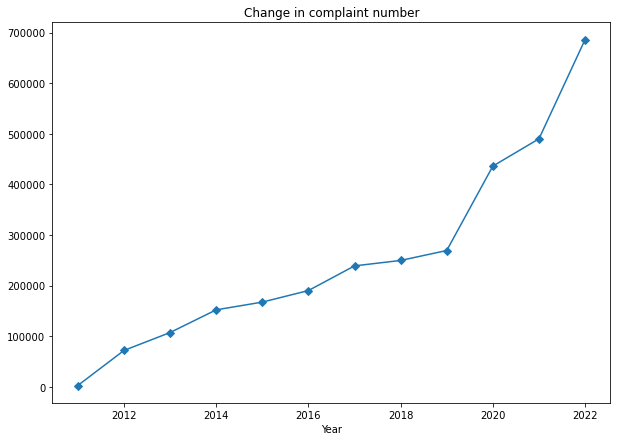

In [14]:
# Let's have a look at the changes in complaint numbers from 2012 to 2022. As indicated by the plot, complaint
# number is increasing, peaking in 2022.
fig, ax = plt.subplots(figsize = (10,7))
noa['Date received'] = pd.to_datetime(noa['Date received'])
noa['Year'] = noa['Date received'].dt.year
ax.set_title('Change in complaint number')
noa.groupby('Year')['Date received'].count().plot(marker = 'D')

<AxesSubplot:title={'center':'EQUIFAX INC Complaint Change'}, xlabel='Year'>

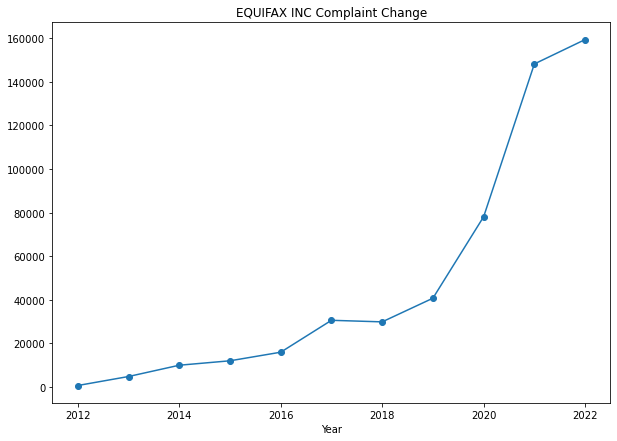

In [15]:
# Now let's look at company EQUIFAX INC, which has the most complaint cases. As indicated by the plot, the company's
# complaint pattern is aligned with industry trend, but its complaint number increased faster, starting from 2019. 
# However, the increase slowed down from 2021.

fig, ax = plt.subplots(figsize = (10,7))
df = noa[noa['Company'] == 'EQUIFAX, INC.'] 
ax.set_title('EQUIFAX INC Complaint Change')
df.groupby('Year')['Date received'].count().plot(marker = 'o')


<AxesSubplot:title={'center':'Industry Complained Product'}, ylabel='Product'>

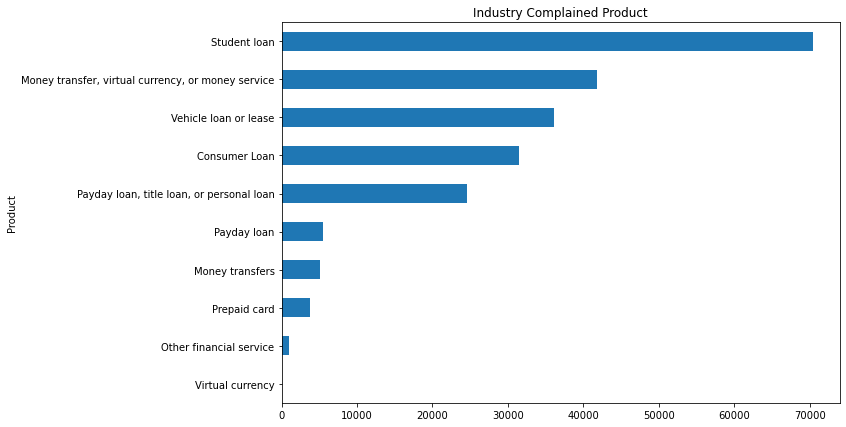

In [16]:
# Among all companies, credit reporting and related reporting products are most complained about by consumers.
fig, ax = plt.subplots(figsize = (10,7))
ax.set_title('Industry Complained Product')
noa.groupby('Product')['Date received'].count().sort_values(ascending = True).head(10).plot.barh()

<AxesSubplot:title={'center':'EQUIFAX INC Complained Product'}, ylabel='Product'>

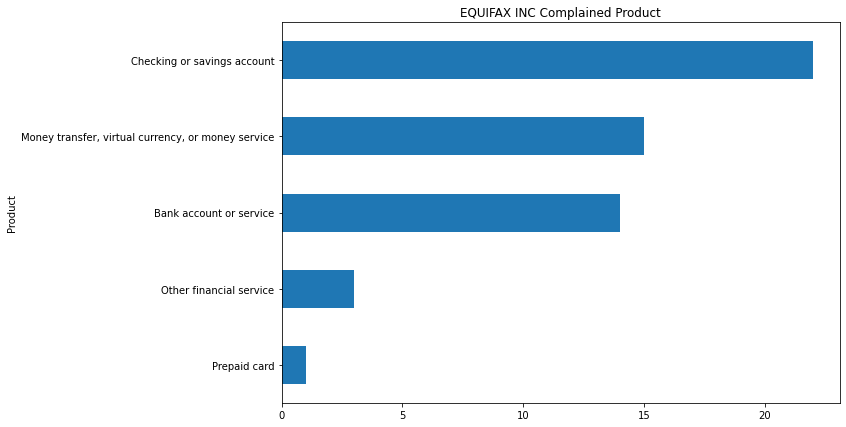

In [17]:
# EQUIFAX INC's most complained product is also credit reporting. However, considering that the company only has
# three products and its high complaint cases, EQUIFAX INC is facing serious problems with their credit reporting product.
fig, ax = plt.subplots(figsize = (10,7))
ax.set_title('EQUIFAX INC Complained Product')
df.groupby('Product')['Date received'].count().sort_values(ascending = True).head().plot.barh()

<AxesSubplot:ylabel='Issue'>

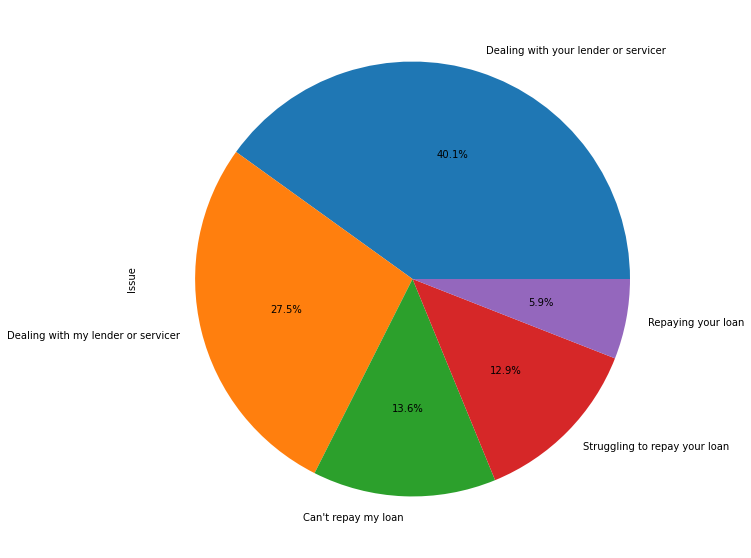

In [160]:
# Now let's look at the top 5 issues consumers are complaining about the credit reporting product.
fig, ax = plt.subplots(figsize = (10,10))
df2 = noa[noa['Product'] == 'Student loan'] 
df2['Issue'].value_counts().head(5).plot.pie(autopct = '%1.1f%%')

In [19]:
# Let's have a look at if complaints are related to the area where companies are located.
# First, let's create a new dataframe for the number of complaints of each state.
case = pd.DataFrame(noa.groupby('State').size()).reset_index()
case.columns = ['State','size']
case.sort_values(by = 'size',ascending = False).head()

,State,size
8,CA,378556
13,FL,347122
53,TX,302458
42,NY,202840
15,GA,194807


In [20]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [21]:
# Now let's create a geographical plot to show the number of complaints for each state.
# As indiacted by the graph, top three states with most complaints are CA, FL, and TX. Complaint number seems
# to be related to the states where companies are located.

data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = case['State'],
        locationmode = "USA-states",
        z = case['size'],
        text = case['State'],
        colorbar = {'title' : 'Number of cases reported'},
      )

layout = dict(title = 'USA Consumer Complaints',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)


<function matplotlib.pyplot.show(close=None, block=None)>

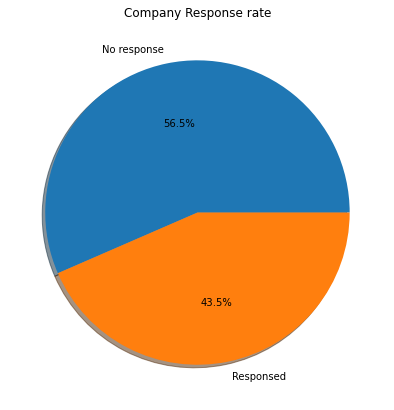

In [22]:
# Now let's have look at companies' reactions. How many cases receive a response?
# The chart shows that more tha half of the cases received a response from companies.
fig, ax = plt.subplots(figsize = (10,7))
x = noa[noa['Company public response'] == 'No'].count().sum()
y = noa[noa['Company public response'] != 'No'].count().sum()
response = np.array([x,y])
my_labels = ['No response','Responsed']
plt.pie(response, labels = my_labels, autopct='%1.1f%%',shadow = True)
plt.title('Company Response rate')
plt.show

Text(0.5, 1.0, 'Company Response Types')

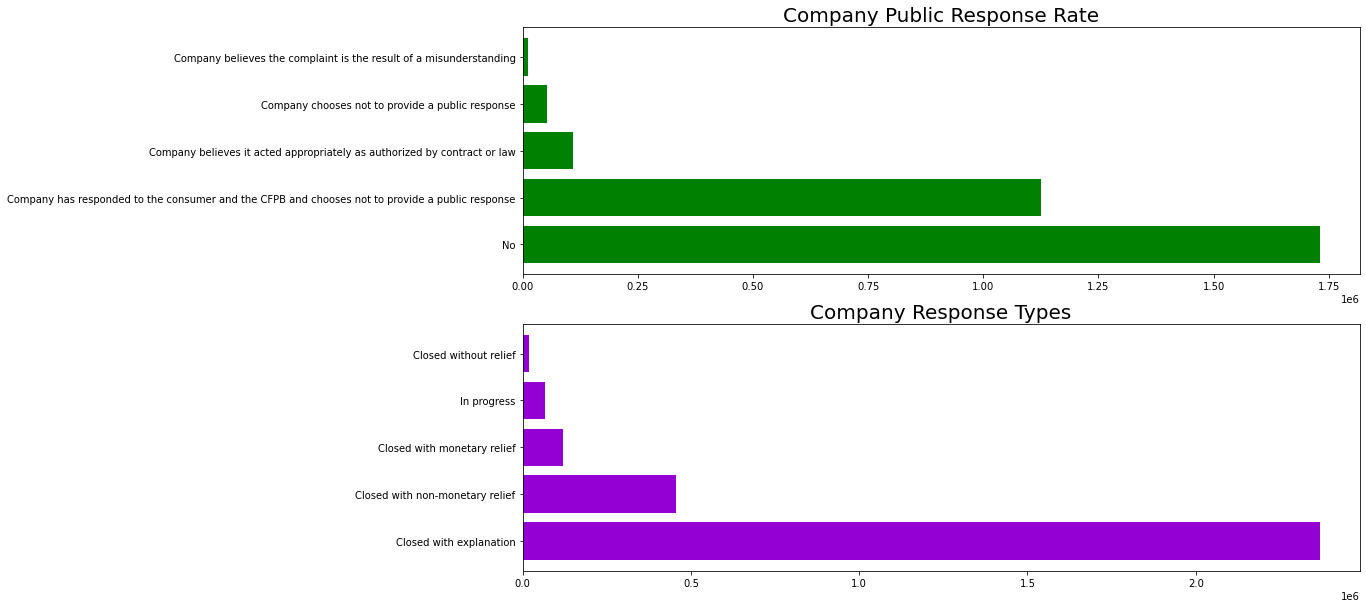

In [23]:
# As indicated by the chart, most companies which responsed tended to settle complaints privately with customers.
# Also, there are many cases where companies did not agree with the complaints and may even disputes the facts
# presented in the complaints.
fig, ax = plt.subplots(2,1,figsize = (15,10))
x = noa['Company public response'].value_counts().head().index
y = noa['Company public response'].value_counts().head().values
ax[0].barh(x,y, color = 'g')
ax[0].set_title('Company Public Response Rate',fontsize = 20)

x1= noa['Company response to consumer'].value_counts().head().index
y1 = noa['Company response to consumer'].value_counts().head().values
ax[1].barh(x1,y1, color = 'darkviolet')
ax[1].set_title('Company Response Types',fontsize = 20)


# The second chart indicates that most companies were able to close the complaint with explanation without making
# the response public. Most companies that were not able to provide an explanation also managed to close the complaints
# by offering different kinds of relief. There was only a very small number of companies that did not even offer 
# relief but closed the complaints.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

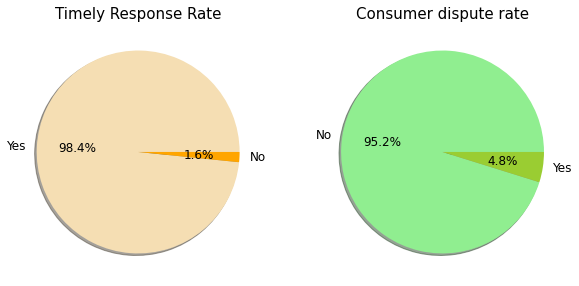

In [24]:
# Let's further look at if companies responsed timely and if consumers disputed.
# As indicated by the charts, nearly all companies provided timely response to complaints, and only a very small
# number of consumers chose to dispute against the companies, although there is a high non-response rate.

fig, ax = plt.subplots(1,2, figsize = (10,7))

ax[0].pie(noa['Timely response?'].value_counts(), labels = noa['Timely response?'].value_counts().index,
         autopct = '%1.1f%%', shadow = True, colors = ['wheat','orange'],textprops = {'fontsize':12})
ax[0].set_title('Timely Response Rate', fontsize = 15)

ax[1].pie(noa['Consumer disputed?'].value_counts(), labels = noa['Consumer disputed?'].value_counts().index
          , autopct = '%1.1f%%',textprops = {'fontsize':12}, 
          colors = ['lightgreen','yellowgreen'],shadow = True)
ax[1].set_title('Consumer dispute rate', fontsize = 15)
plt.tight_layout

Text(0.5, 1.0, 'EQUIFAX INC. Consumer dispute rate')

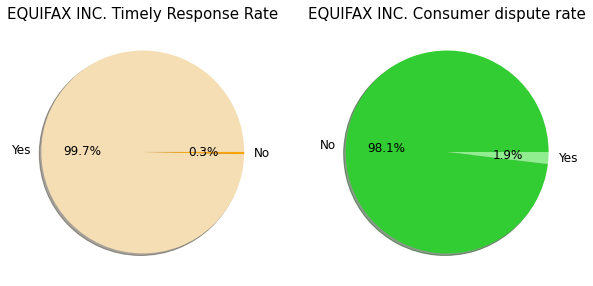

In [25]:
# Let's look at the response rate and consumer dispute rate of EQUIFAX, INC, which has the most complaint.
# The charts indicate that EUIFAX INC. has a similar timely response rate to the industry. However, consumers are
# more likely to not response, and there seem to be more dispute cases given the company's low no-dispute proportion.
fig, ax = plt.subplots(1,2, figsize = (10,7))
x = noa[noa['Company'] == 'EQUIFAX, INC.']['Timely response?'].value_counts()
ax[0].pie(x,labels = noa[noa['Company'] == 'EQUIFAX, INC.']['Timely response?'].value_counts().index,
         autopct = '%1.1f%%', shadow = True, colors = ['wheat','orange'],textprops = {'fontsize':12})
ax[0].set_title('EQUIFAX INC. Timely Response Rate', fontsize = 15)


ax[1].pie(noa[noa['Company'] == 'EQUIFAX, INC.']['Consumer disputed?'].value_counts(),
          labels = noa[noa['Company'] == 'EQUIFAX, INC.']['Consumer disputed?'].value_counts().index,
          autopct = '%1.1f%%',textprops = {'fontsize':12}, 
          colors = ['limegreen','lightgreen','yellowgreen'], shadow = True)
ax[1].set_title('EQUIFAX INC. Consumer dispute rate', fontsize = 15)

Text(0.5, 1.0, 'EQUIFAX INC. Non-timely response Issues')

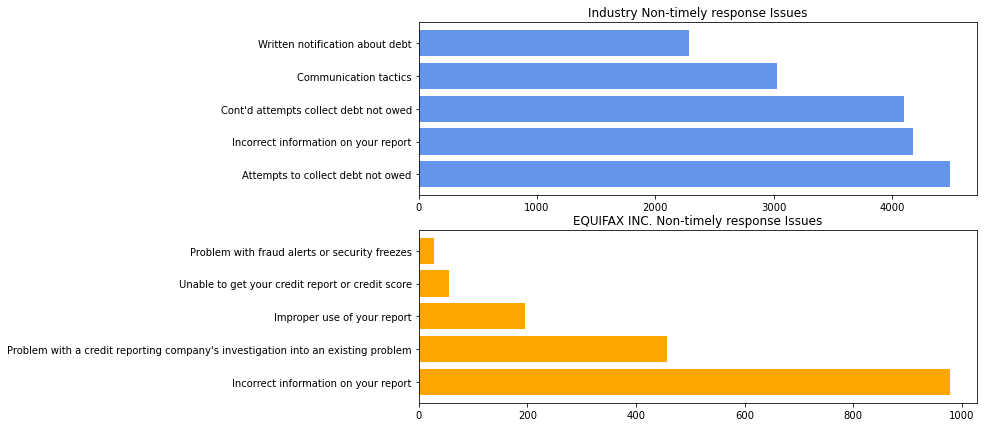

In [26]:
# Looking into the tiny proportion of Non-timely responses, the chart indicates that for the whole industry, issues 
# with debt are top reasons. However, for EQUIFAX INC, things are very different. The chart indicates that issues
# with reporting are the main reasons for the company's non-timely responses.

fig, ax = plt.subplots(2,1,figsize = (10,7))
x1 = noa[noa['Timely response?'] == 'No']['Issue'].value_counts().head().index
y1 = noa[noa['Timely response?'] == 'No']['Issue'].value_counts().head().values
x2 = noa[(noa['Timely response?'] == 'No') & (noa['Company'] == 'EQUIFAX, INC.')]['Issue'].value_counts().head().index
y2 = noa[(noa['Timely response?'] == 'No') & (noa['Company'] == 'EQUIFAX, INC.')]['Issue'].value_counts().head().values
ax[0].barh(x1,y1, color = 'cornflowerblue')
ax[1].barh(x2,y2,color = 'orange')
ax[0].set_title('Industry Non-timely response Issues')
ax[1].set_title('EQUIFAX INC. Non-timely response Issues')


In [27]:
# It is difficult to find correlations between different variables, considering many variables are categorical.
# Before modelling, we need to create dummies for these variables.
# First, let's drop columns that are not meaningful for analysis
noa.drop(columns = ['Date received','ZIP code','Tags','Date sent to company'], axis = 1, inplace = True)
noa.head()

/var/folders/h8/zy5q95td7t11cvkwz9yd5dph0000gn/T/ipykernel_7535/3599978146.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year
Complaint ID,,,,,,,,,,,,,,
6190415,Mortgage,Conventional home mortgage,Trouble during payment process,N/A,N/A,No,"AmeriHome Mortgage Company, LLC",NC,No,Web,In progress,Yes,No,2022
6236178,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,N/A,No,"EQUIFAX, INC.",TN,No,Web,In progress,Yes,No,2022
6212558,Mortgage,VA mortgage,Trouble during payment process,N/A,N/A,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",FL,No,Web,Closed with explanation,Yes,No,2022
6206885,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,MD,Consent provided,Web,Closed with explanation,Yes,No,2022
6173945,Mortgage,Other type of mortgage,Trouble during payment process,N/A,N/A,No,NORTHERN OHIO INVESTMENT COMPANY,MO,Other,Web,Untimely response,No,No,2022


In [28]:
# Before transforming categorical variables into dummies, it may be easier to simply transform some variables into
# binary ones. For target variables that i will predict, i simly change them into 1 or 0.
noa.loc[noa['Sub-issue'] != 'N/A', 'Sub-issue'] = 'Yes'
noa.loc[noa['Consumer complaint narrative'] != 'N/A', 'Consumer complaint narrative'] = 'Yes'
noa.loc[noa['Company public response'] != 'No', 'Company public response'] = 'Yes'
noa.loc[noa['Timely response?'] == 'Yes', 'Timely response?'] = 1
noa.loc[noa['Timely response?'] == 'No', 'Timely response?'] = 0
noa.loc[noa['Consumer disputed?'] == 'Yes', 'Consumer disputed?'] = 1
noa.loc[noa['Consumer disputed?'] == 'No', 'Consumer disputed?'] = 0
noa.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year
Complaint ID,,,,,,,,,,,,,,
6190415,Mortgage,Conventional home mortgage,Trouble during payment process,N/A,N/A,No,"AmeriHome Mortgage Company, LLC",NC,No,Web,In progress,1,0,2022
6236178,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Yes,N/A,No,"EQUIFAX, INC.",TN,No,Web,In progress,1,0,2022
6212558,Mortgage,VA mortgage,Trouble during payment process,N/A,N/A,Yes,"Shellpoint Partners, LLC",FL,No,Web,Closed with explanation,1,0,2022
6206885,Checking or savings account,Checking account,Managing an account,Yes,Yes,Yes,WELLS FARGO & COMPANY,MD,Consent provided,Web,Closed with explanation,1,0,2022
6173945,Mortgage,Other type of mortgage,Trouble during payment process,N/A,N/A,No,NORTHERN OHIO INVESTMENT COMPANY,MO,Other,Web,Untimely response,0,0,2022


In [29]:
# Considering that the dataset is too large, I will mainly focus on company 'EQUIFAX, INC.' when bulding models
# and make predictions.

eq = noa[noa['Company'] == 'EQUIFAX, INC.']
eq.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year
Complaint ID,,,,,,,,,,,,,,
6236178,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Yes,N/A,No,"EQUIFAX, INC.",TN,No,Web,In progress,1,0,2022
6231498,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Yes,N/A,No,"EQUIFAX, INC.",OK,No,Web,In progress,1,0,2022
6236631,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Yes,N/A,No,"EQUIFAX, INC.",NV,No,Web,In progress,1,0,2022
6197918,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Yes,N/A,No,"EQUIFAX, INC.",CA,No,Web,In progress,1,0,2022
6235783,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Yes,N/A,No,"EQUIFAX, INC.",NY,No,Web,In progress,1,0,2022


In [30]:
d_product = pd.get_dummies(eq['Product'], prefix = 'product',drop_first = True)
d_subproduct = pd.get_dummies(eq['Sub-product'], prefix = 'sub-p',drop_first = True)
d_issue = pd.get_dummies(eq['Issue'], prefix = 'issue',drop_first = True)
d_subissue = pd.get_dummies(eq['Sub-issue'], prefix = 'sub-i',drop_first = True)
d_narr = pd.get_dummies(eq['Consumer complaint narrative'], prefix = 'narr',drop_first = True)
d_cpr = pd.get_dummies(eq['Company public response'], prefix = 'cpr', drop_first = True)
d_company = pd.get_dummies(eq['Company'], drop_first = True)
d_state = pd.get_dummies(eq['State'], drop_first = True)
d_ccp = pd.get_dummies(eq['Consumer consent provided?'], prefix = 'ccp',drop_first = True)
d_sub = pd.get_dummies(eq['Submitted via'], drop_first = True)
d_crtc = pd.get_dummies(eq['Company response to consumer'], drop_first = True)
d_year = pd.get_dummies(eq['Year'], drop_first = True)

In [31]:
eq_lg = eq.merge(d_product, on = 'Complaint ID' )

In [32]:
eq_lg = eq_lg.merge(d_company, on = 'Complaint ID')

In [33]:
eq_lg = eq_lg.merge(d_issue, on = 'Complaint ID')

In [34]:
eq_lg = eq_lg.merge(d_subissue, on = 'Complaint ID')

In [35]:
eq_lg = eq_lg.merge(d_narr, on = 'Complaint ID')

In [36]:
eq_lg = eq_lg.merge(d_cpr, on = 'Complaint ID')

In [37]:
eq_lg = eq_lg.merge(d_subproduct, on = 'Complaint ID')

In [38]:
eq_lg = eq_lg.merge(d_state, on = 'Complaint ID')

In [39]:
eq_lg = eq_lg.merge(d_ccp, on = 'Complaint ID')

In [40]:
eq_lg = eq_lg.merge(d_sub, on = 'Complaint ID')

In [41]:
eq_lg = eq_lg.merge(d_crtc, on = 'Complaint ID')

In [42]:
eq_lg = eq_lg.merge(d_year, on = 'Complaint ID')

In [43]:
eq_lg.drop(columns = ['Product','Sub-product','Issue','Sub-issue','Consumer complaint narrative',
                               'Company public response','Company','State','Consumer consent provided?',
                               'Submitted via','Company response to consumer','Year'], axis = 1, inplace = True)

In [44]:
eq_lg.head()

,Timely response?,Consumer disputed?,product_Checking or savings account,product_Consumer Loan,product_Credit card,product_Credit card or prepaid card,product_Credit reporting,"product_Credit reporting, credit repair services, or other personal consumer reports",product_Debt collection,"product_Money transfer, virtual currency, or money service",...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Complaint ID,,,,,,,,,,,,,,,,,,,,,
6236178,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6231498,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6236631,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6197918,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6235783,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# Let's see for timeley response, what is its correlation with other variables.
timely = eq_lg[eq_lg['Timely response?'] == 1]
timely.corr()

,product_Checking or savings account,product_Consumer Loan,product_Credit card,product_Credit card or prepaid card,product_Credit reporting,"product_Credit reporting, credit repair services, or other personal consumer reports",product_Debt collection,"product_Money transfer, virtual currency, or money service",product_Mortgage,product_Other financial service,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
product_Checking or savings account,1.000000,-0.000066,-0.000060,-0.000188,-0.002039,-0.018640,-0.000779,-0.000034,-0.000105,-0.000015,...,-0.000615,-0.000893,-0.000983,-0.001137,0.002306,-0.000308,-0.001861,-0.000208,0.001848,-0.000409
product_Consumer Loan,-0.000066,1.000000,-0.000095,-0.000298,-0.003224,-0.029474,-0.001232,-0.000054,-0.000166,-0.000024,...,0.008854,0.010882,0.008421,0.022085,0.005682,-0.002496,-0.002943,-0.004250,-0.006371,-0.006709
product_Credit card,-0.000060,-0.000095,1.000000,-0.000272,-0.002949,-0.026955,-0.001127,-0.000050,-0.000151,-0.000022,...,0.022749,0.004683,0.009486,0.019723,-0.001360,-0.002283,-0.002691,-0.003887,-0.005826,-0.006135
product_Credit card or prepaid card,-0.000188,-0.000298,-0.000272,1.000000,-0.009216,-0.084245,-0.003521,-0.000155,-0.000473,-0.000070,...,-0.002778,-0.004037,-0.004440,-0.005139,-0.001616,0.011440,0.006471,-0.003179,-0.007364,0.006155
product_Credit reporting,-0.002039,-0.003224,-0.002949,-0.009216,1.000000,-0.912743,-0.038146,-0.001684,-0.005126,-0.000753,...,0.299864,0.436625,0.479994,0.552875,0.068643,-0.077299,-0.091132,-0.131606,-0.197284,-0.207751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,-0.000308,-0.002496,-0.002283,0.011440,-0.077299,0.058001,0.033539,0.001775,-0.000429,-0.000583,...,-0.023303,-0.033859,-0.037243,-0.043103,-0.058981,1.000000,-0.070548,-0.101880,-0.152724,-0.160826
2019,-0.001861,-0.002943,-0.002691,0.006471,-0.091132,0.072179,0.030972,0.005134,0.002335,-0.000687,...,-0.027474,-0.039919,-0.043908,-0.050817,-0.069536,-0.070548,1.000000,-0.120113,-0.180055,-0.189608
2020,-0.000208,-0.004250,-0.003887,-0.003179,-0.131606,0.109942,0.034845,0.000783,-0.001495,-0.000992,...,-0.039675,-0.057648,-0.063409,-0.073386,-0.100418,-0.101880,-0.120113,1.000000,-0.260022,-0.273817
2021,0.001848,-0.006371,-0.005826,-0.007364,-0.197284,0.188830,-0.010489,-0.002536,-0.003374,-0.001488,...,-0.059475,-0.086417,-0.095053,-0.110009,-0.150532,-0.152724,-0.180055,-0.260022,1.000000,-0.410466


In [46]:
# As shown below, apart from variable's correlation with itself, the strongest correlation exists
# between sub-p_N/A and the product_Credit reporting, which means that a the product category of credit reporting
# is highly related to a N/A value in the sub product. Most credit reporting products has no sub product.

timely.corr().unstack().sort_values(ascending = False).drop_duplicates()

product_Checking or savings account                                                   product_Checking or savings account                                                     1.000000
sub-p_N/A                                                                             product_Credit reporting                                                                0.999381
ccp_Consent provided                                                                  narr_Yes                                                                                0.999206
sub-p_Credit reporting                                                                product_Credit reporting, credit repair services, or other personal consumer reports    0.976972
product_Credit card or prepaid card                                                   sub-p_General-purpose credit card or charge card                                        0.929539
                                                                                     

In [47]:
# Let's see for delayed response, what is its correlation with other variables. It seems that many variables
# have no relationships if simply look at delayed response records.
delayed = eq_lg[eq_lg['Timely response?'] == 0]
delayed.corr()

,product_Checking or savings account,product_Consumer Loan,product_Credit card,product_Credit card or prepaid card,product_Credit reporting,"product_Credit reporting, credit repair services, or other personal consumer reports",product_Debt collection,"product_Money transfer, virtual currency, or money service",product_Mortgage,product_Other financial service,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
product_Checking or savings account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_Consumer Loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_Credit card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_Credit card or prepaid card,NaN,NaN,NaN,1.000000,-0.001387,-0.303662,-0.005131,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.000980,0.016250,-0.002778,-0.011752,-0.003406,-0.009087,-0.001387
product_Credit reporting,NaN,NaN,NaN,-0.001387,1.000000,-0.247869,-0.004188,NaN,NaN,NaN,...,NaN,NaN,NaN,0.706907,-0.036032,-0.002268,-0.009592,-0.002780,-0.007417,-0.001132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,NaN,NaN,NaN,-0.002778,-0.002268,-0.054068,0.060331,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.001603,-0.170948,1.000000,-0.019218,-0.005570,-0.014860,-0.002268
2019,NaN,NaN,NaN,-0.011752,-0.009592,0.022614,-0.018010,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.006781,-0.723158,-0.019218,1.000000,-0.023563,-0.062861,-0.009592
2020,NaN,NaN,NaN,-0.003406,-0.002780,0.011217,-0.010289,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.001965,-0.209606,-0.005570,-0.023563,1.000000,-0.018220,-0.002780
2021,NaN,NaN,NaN,-0.009087,-0.007417,0.009750,-0.005517,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.005243,-0.559176,-0.014860,-0.062861,-0.018220,1.000000,-0.007417


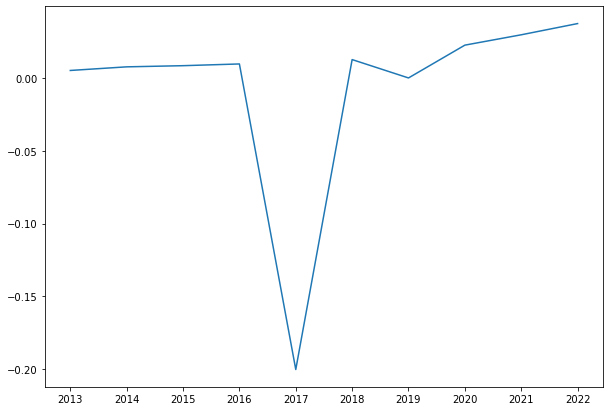

In [48]:
# The correlation between different year and timely response is not constant. As shown in the plot below,
# for most years, the correlation is positive, except for 2017.
eq_lg = eq_lg.astype('float16')
tr_2022 = np.corrcoef(eq_lg['Timely response?'], eq_lg[2022])[0][1]
tr_2021 = np.corrcoef(eq_lg['Timely response?'], eq_lg[2021])[0][1]
tr_2020 = np.corrcoef(eq_lg['Timely response?'], eq_lg[2020])[0][1]
tr_2019 = np.corrcoef(eq_lg['Timely response?'], eq_lg[2019])[0][1]
tr_2018 = np.corrcoef(eq_lg['Timely response?'], eq_lg[2018])[0][1]
tr_2017 = np.corrcoef(eq_lg['Timely response?'], eq_lg[2017])[0][1]
tr_2016 = np.corrcoef(eq_lg['Timely response?'], eq_lg[2016])[0][1]
tr_2015 = np.corrcoef(eq_lg['Timely response?'], eq_lg[2015])[0][1]
tr_2014 = np.corrcoef(eq_lg['Timely response?'], eq_lg[2014])[0][1]
tr_2013 = np.corrcoef(eq_lg['Timely response?'], eq_lg[2013])[0][1]
d = {'2013':[tr_2013],'2014':[tr_2014],'2015':[tr_2015],'2016':[tr_2016],'2017':[tr_2017],'2018':[tr_2018],
    '2019':[tr_2019],'2020':[tr_2020],'2021':[tr_2021],'2022':[tr_2022]}
year_corr = pd.DataFrame(data = d)
year_corrt = year_corr.transpose()
year_corrt.rename(columns = {0:'Correlation'},inplace = True)
fig,ax = plt.subplots(figsize = (10,7))
plt.plot(year_corrt)

In [49]:
# Finally, let's try to build a logistic regression model for predicting if EQUIFAX will provide a timely response
# to a complaint.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [50]:
eq_lg.head()

,Timely response?,Consumer disputed?,product_Checking or savings account,product_Consumer Loan,product_Credit card,product_Credit card or prepaid card,product_Credit reporting,"product_Credit reporting, credit repair services, or other personal consumer reports",product_Debt collection,"product_Money transfer, virtual currency, or money service",...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Complaint ID,,,,,,,,,,,,,,,,,,,,,
6236178,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6231498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6236631,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6197918,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6235783,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
eq_lg.columns = eq_lg.columns.astype(str)

In [52]:
eq_lg.dtypes

Timely response?                       float16
Consumer disputed?                     float16
product_Checking or savings account    float16
product_Consumer Loan                  float16
product_Credit card                    float16
                                        ...   
2018                                   float16
2019                                   float16
2020                                   float16
2021                                   float16
2022                                   float16
Length: 256, dtype: object

In [53]:
# We can see the dataset is very unbalanced.
eq_lg['Timely response?'].value_counts()

1.0    528280
0.0      1769
Name: Timely response?, dtype: int64

In [100]:
class_count_1, class_count_0 = eq_lg['Timely response?'].value_counts()

In [97]:
class_0 = eq_lg[eq_lg['Timely response?'] == 0]
class_1 = eq_lg[eq_lg['Timely response?'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1769, 256)
class 1: (528280, 256)


total class of 1 and 0: 1.0    1769
0.0    1769
Name: Timely response?, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

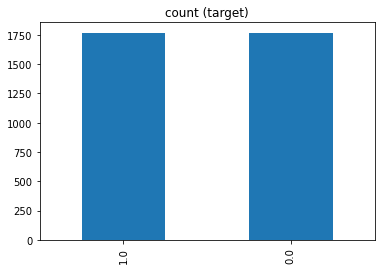

In [103]:
class_1_under = class_1.sample(class_count_0)

test_under = pd.concat([class_1_under, class_0], axis=0)

print("total class of 1 and 0:",test_under['Timely response?'].value_counts())# plot the count after under-sampeling
test_under['Timely response?'].value_counts().plot(kind='bar', title='count (target)')


In [104]:
test_under.head()

,Timely response?,Consumer disputed?,product_Checking or savings account,product_Consumer Loan,product_Credit card,product_Credit card or prepaid card,product_Credit reporting,"product_Credit reporting, credit repair services, or other personal consumer reports",product_Debt collection,"product_Money transfer, virtual currency, or money service",...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Complaint ID,,,,,,,,,,,,,,,,,,,,,
4682117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2794952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2770663,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3821025,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1717056,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# To deal with unbalanced dataset, we can specify the class_weight parameter when performing logistic regression.

X_train,X_test,y_train,y_test = train_test_split(test_under.drop('Timely response?',axis = 1),
                                                test_under['Timely response?'], test_size = 0.30,
                                                random_state = 101)
logmodel = LogisticRegression(class_weight = 'balanced')
logmodel.fit(X_train,y_train)



LogisticRegression(class_weight='balanced')

In [106]:
predictions = logmodel.predict(X_test)

In [107]:
# As indicated by the classification report and confusion matrix, the logistic regression model does a good job
# in predicting if EQUIFAC will provide timely response.

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       525
         1.0       0.88      0.92      0.90       537

    accuracy                           0.90      1062
   macro avg       0.90      0.90      0.90      1062
weighted avg       0.90      0.90      0.90      1062

[[459  66]
 [ 42 495]]


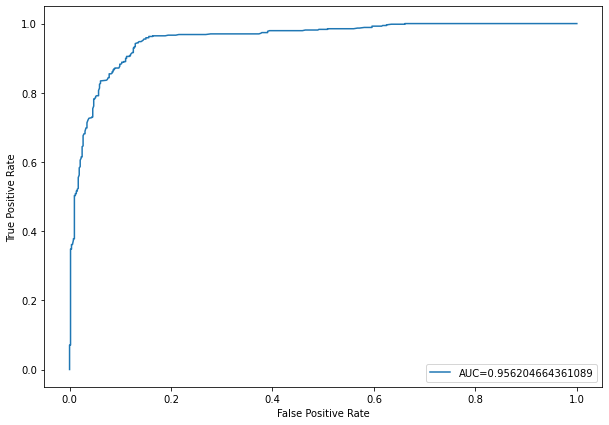

In [108]:
# Let's plot the ROC curve and determine the AUC to have a more strightforward idea about the model. 

from sklearn import metrics
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (10,7))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [109]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance

In [110]:
treecom = tree.DecisionTreeClassifier(criterion = 'entropy')
treecom = treecom.fit(X_train, y_train)

In [111]:
y_pred_test = treecom.predict(X_test)

In [112]:
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       525
         1.0       0.87      0.89      0.88       537

    accuracy                           0.88      1062
   macro avg       0.88      0.88      0.88      1062
weighted avg       0.88      0.88      0.88      1062

[[456  69]
 [ 58 479]]


In [113]:
eq_lg.head()

,Timely response?,Consumer disputed?,product_Checking or savings account,product_Consumer Loan,product_Credit card,product_Credit card or prepaid card,product_Credit reporting,"product_Credit reporting, credit repair services, or other personal consumer reports",product_Debt collection,"product_Money transfer, virtual currency, or money service",...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Complaint ID,,,,,,,,,,,,,,,,,,,,,
6236178,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6231498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6236631,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6197918,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6235783,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


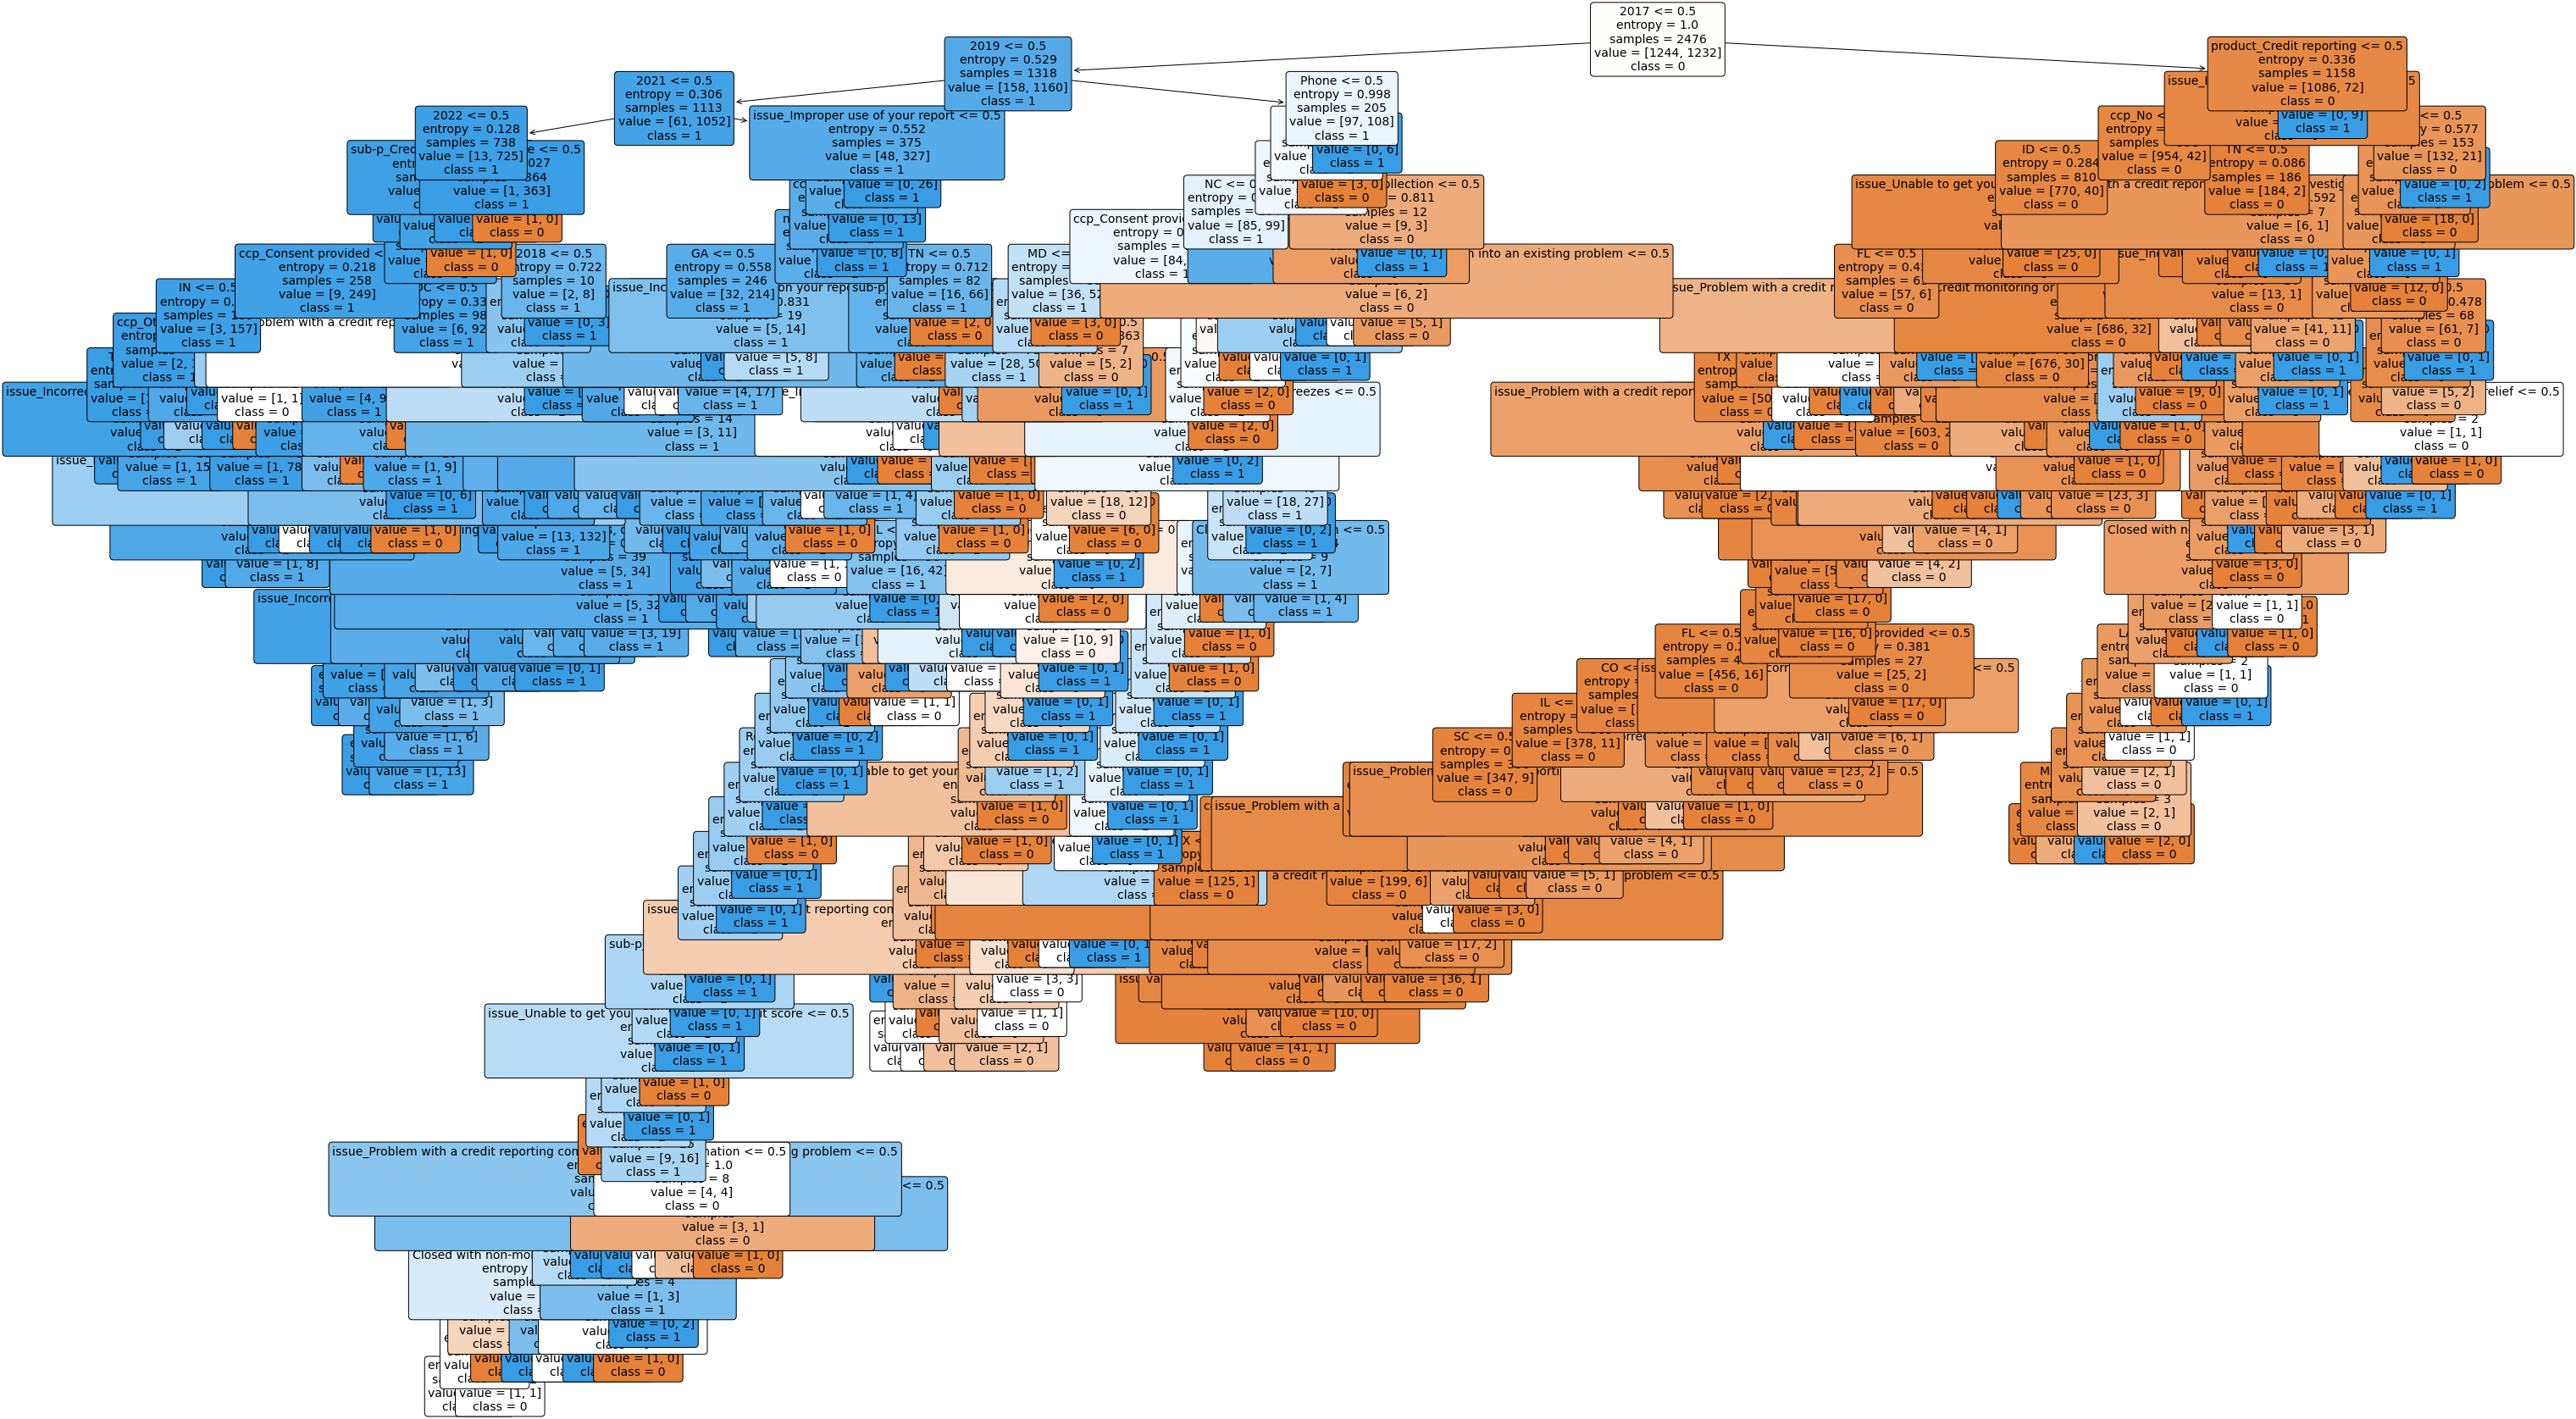

In [115]:
fig, ax = plt.subplots(figsize = (50,30))
a = tree.plot_tree(treecom, feature_names = test_under.columns.drop('Timely response?') , class_names = ['0','1'],
             filled = True,
             rounded = True,
             fontsize = 14)
plt.savefig('decision_tree.png')

In [116]:
# Let's now optimize the model by decreasing the level and complexity.
treecom1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
treecom1 = treecom1.fit(X_train,y_train)

In [117]:
y_pred = treecom1.predict(X_test)

In [118]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90       525
         1.0       0.86      0.96      0.91       537

    accuracy                           0.90      1062
   macro avg       0.91      0.90      0.90      1062
weighted avg       0.91      0.90      0.90      1062

[[444  81]
 [ 21 516]]


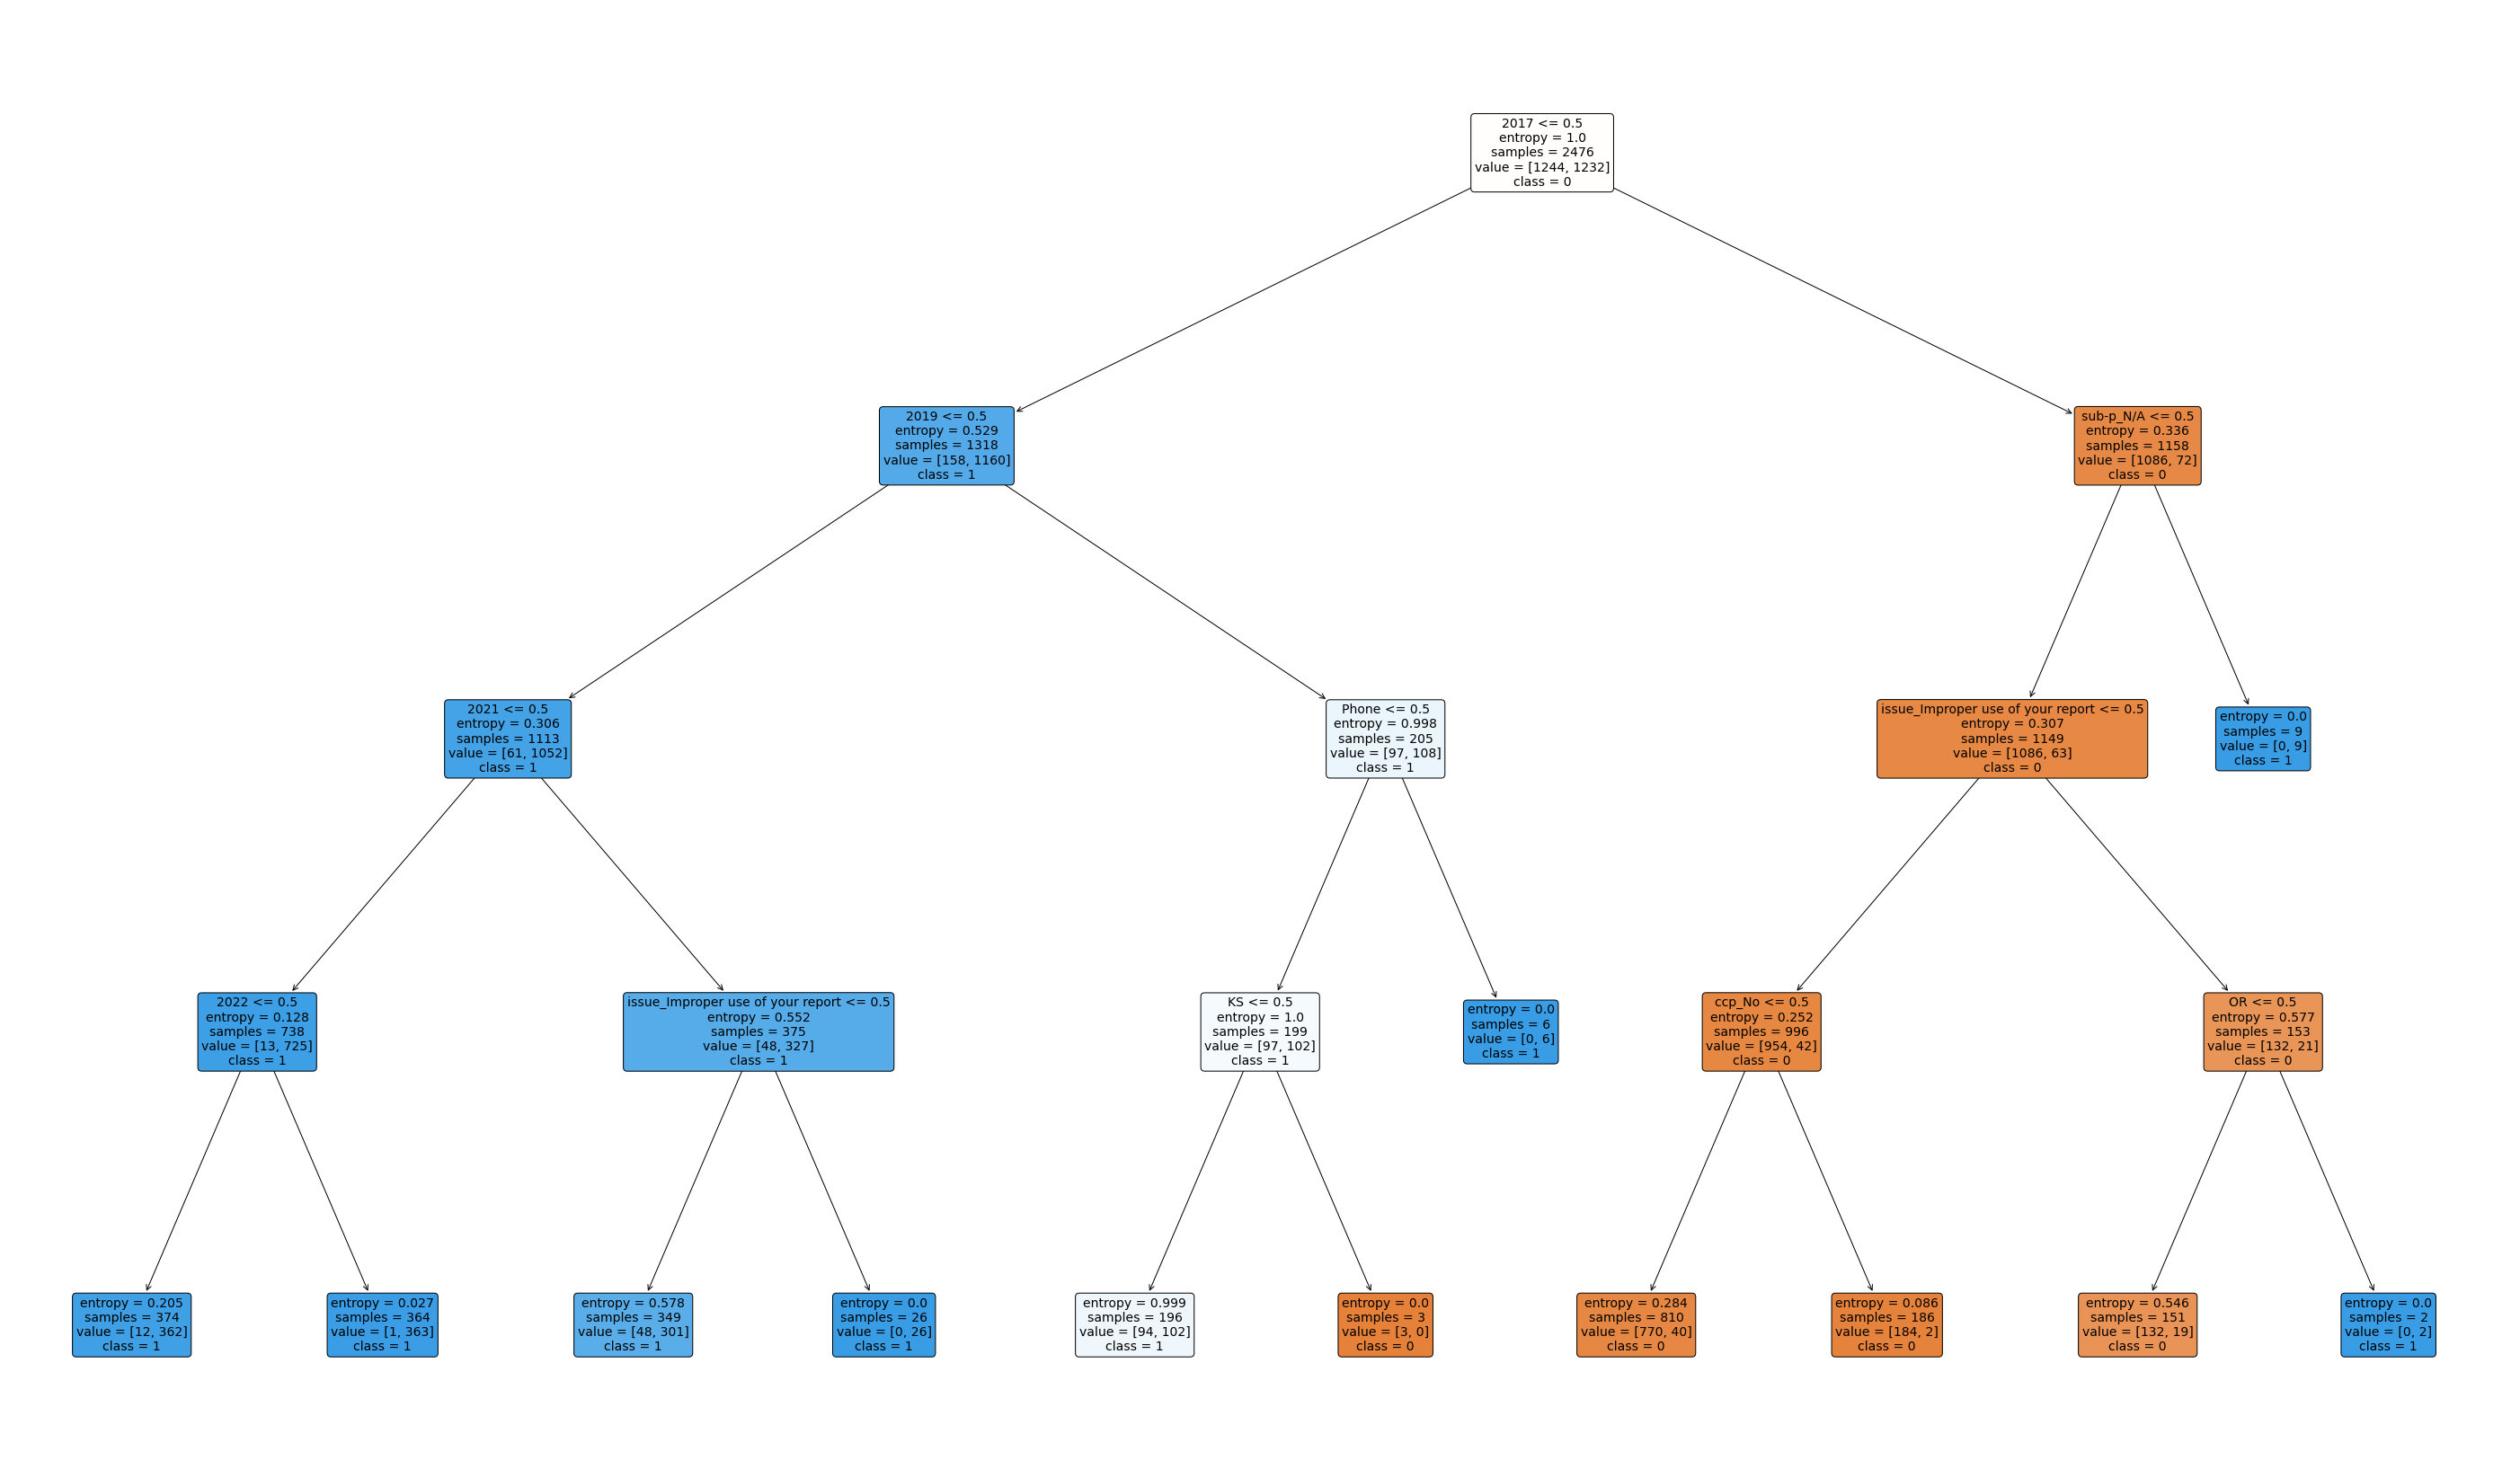

In [119]:
fig, ax = plt.subplots(figsize = (50,30))
a = tree.plot_tree(treecom1, feature_names = test_under.columns.drop('Timely response?') , class_names = ['0','1'],
             filled = True,
             rounded = True,
             fontsize = 14)
plt.savefig('decision_tree.png')

In [159]:
# We can also see which variables are most significant in deciding the label: 
# top 5 variables: 2017, 2019, 2021, sub-p_N/A, issue_improper use of your report

a = pd.DataFrame([treecom1.feature_importances_], 
                 columns = test_under.columns.drop('Timely response?'), index = ['significance'] )
importance = a.sort_values(by = 'significance', axis = 1, ascending = False)
importance.head()

,2017,2019,2021,sub-p_N/A,issue_Improper use of your report,2022,OR,Phone,ccp_No,KS,...,issue_Problem with the payoff process at the end of the loan,issue_Problems at the end of the loan or lease,issue_Problems when you are unable to pay,issue_Received a loan you didn't apply for,issue_Settlement process and costs,issue_Shopping for a line of credit,issue_Shopping for a loan or lease,issue_Struggling to pay mortgage,issue_Struggling to pay your bill,sub-p_Foreign currency exchange
significance,0.835196,0.09109,0.023917,0.022157,0.010919,0.004698,0.003518,0.003405,0.003209,0.00189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
